# Algemeen

Dit is het template voor het labjournaal. Je kunt gebruik maken van markdown cellen om alle informatie in te noteren. Hoe markdown werkt vind je hier: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html.

In [179]:
#importeren van de benodige libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

**Namen:** Thomas Bosch, Lennard Stelloo  

**Titel van het experiment:**  Bepaling van afhankelijkheid van de kracht tussen twee tegenover elkaar geplaatste schijfmagneten en de afstand tussen de magneten.

**Startdatum:**  13 oktober 2023
**Verwachte einddatum:**  13 oktober 2023


**Doel van het experiment:**  

In dit experiment bepalen we de relatie tussen de kracht tussen twee magneten als functie van hun onderlinge afstand. De gebruikte opstelling is hieronder getoond:
<center>
<img src = 'IE1_opstelling.jpg' width = "200" height="20"></img>
</center>
Voor het berekenen van de hart-tot-hart afstand tussen de twee magneten wordt gebruik gemaakt van de volgende definities:
<center>
<img src = 'ie1_opst_onz.jpg' width ="200" height = "20"></img>
</center>

**Onderzoeksvragen:**  Hoe hangt de kracht tussen twee tegenover elkaar geplaatste schijfmagneten af van de afstand tussen de magneten?

**Verwachte uitkomsten:**  

**Gewenste nauwkeurigheid:**  

# Voorbereiding
 


**Opdrachten:**  

**Methode:**  


**Bijbehorende theoretische beschouwing:**  


**Onafhankelijke variabele:**  
**Afhankelijke variabele:**  
**Te controleren variablen:**  


**Meetinstrumenten \& instellingen:**  

**Procedure:**  
**Setup (tekening of foto):**  

In [180]:
#Metingen voorafgaand aan het experiment

#dikte van magneet
d_m = 5e-3  #m 5mm
u_d_m = 0.1e-3  #m

#diepte van aantrekkende magneet
h_1_aan = 3.35e-3  #m 3.35mm
u_h_1_aan = 0.05e-3  #m

#diepte van afstotende magneet
h_1_af = 3.55e-3  #m 3.55mm
u_h_1_af = 0.05e-3  #m

#diepte van magneet onderin
h_2 = 3.70e-3  #m 3.70mm
u_h_2 = 0.05e-3  #m

#gewicht magneetjes
m_aan = 0.013  #kg 0.013
u_m_aan = 0.001  #kg
m_af = 0.093  #kg 0.093
u_m_af = 0.001  #kg

#onzekerheid in Z en F
u_h_12 = 2e-3
u_z = np.sqrt(u_d_m ** 2 + u_h_1_af ** 2 + u_h_2 ** 2 + u_h_12 ** 2)
u_F = 1e-3 * 9.81


**Notities:**  Er is een aantrekkingskracht tussen de magneten en het statief, dit zou voor onnauwkeurigheden kunnen zorgen.
**Over de nauwkeurigheid:** De nauwkeurigheid van de schuifmaat stond op de schuifmaat, hiermee zijn h1-af, h1-aan en h2 gemeten. De onzekerheid van dm stond in de data sheet.

De 0cm van het meetinstrument van het statief staat niet op de 0 van h12, de afstand is ongeveer 3$\pm$1 mm en is niet verwerkt in het excel bestand.

# Uitvoering

In [181]:
# De metingen zijn opgeslagen in IE_1_metingen_raw.csv. Deze worden ingeladen.
# Vervolgens wordt die dataset uiteengerafeld zodat de variabelen leesbaar zijn

data = np.loadtxt('IE1_metingen_raw.csv', delimiter=';', skiprows=1, unpack=True,
                  dtype=float)  #Note: delimiter kan ook ; zijn

h_12_af = np.array(data[0, :]-3) * 1e-3

F_af = 9.81 * m_af - np.array(data[1, :]) * 9.81

h_12_aan = np.array(data[3, :]-3) * 1e-3

F_aan = np.array(data[4, :]) * 9.81 - m_aan * 9.81
print(h_12_aan)
print(F_aan)
print(h_12_af)
print(F_af)

[0.044  0.012  0.0085 0.006  0.005  0.004  0.003  0.0022 0.0017 0.001 ]
[0.      0.24525 0.47088 0.75537 0.99081 1.20663 1.3734  1.70694 1.91295
 2.27592]
[0.019  0.015  0.012  0.01   0.009  0.008  0.0075 0.007  0.006  0.0055]
[0.0981  0.18639 0.26487 0.35316 0.41202 0.50031 0.56898 0.64746 0.72594
 0.82404]


**Waarnemingen:**  
**Notities:**  

# Verwerking
**Beschrijving van hoe de ruwe data zijn verwerkt tot wetenschappelijk bewijs:**


In [182]:
#Berekening voor de hart-tot-hart afstand tussen de magneten
z_aan = d_m + h_1_aan + h_2 + h_12_aan

z_af = d_m + h_1_af + h_2 + h_12_af

### Data verwerking en analyse:
Bekijk eerst de data zonder de meetonzekerheid te beschouwen. Gebruik de volgende cell om al je data the plotten. Vergeet de wetenschappelijke conventies betreffende grafieken niet!

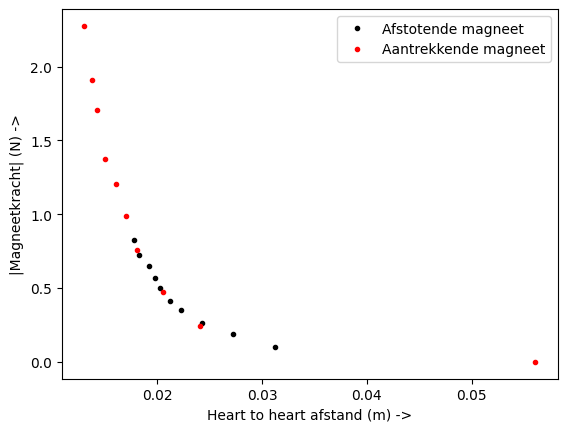

In [183]:
#Data verwerking en analyse:

#(F,z)-plot 
plt.figure()
#** [your code] **
plt.plot(z_af, F_af, 'k.', label="Afstotende magneet")
plt.plot(z_aan, F_aan, 'r.', label="Aantrekkende magneet")
plt.xlabel("Heart to heart afstand (m) ->")
plt.ylabel("|Magneetkracht| (N) ->")
plt.legend()
plt.show()

Op basis van je plot en een visuele inspectie, mag je de twee datasets combineren? Zo ja, combineer de twee datasets.

In [184]:
#combineren arrays 
z = np.concatenate((z_af, z_aan))
F = np.concatenate((F_af, F_aan))

Maak nu een errorbarplot. Zie https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html voor de mogelijkheden.

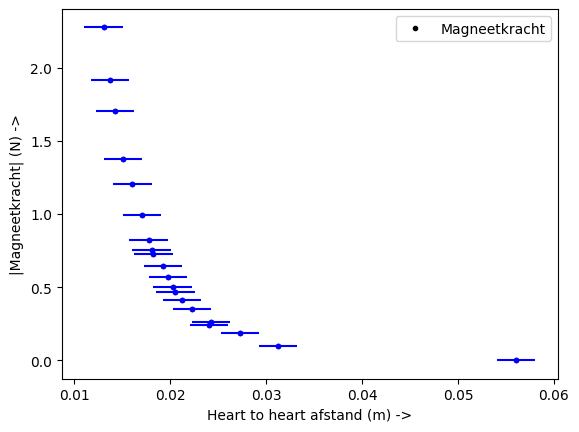

In [185]:
#Data verwerking en analyse:
#(F,z)-plot met errorbars
plt.figure()
#** [your code] **
plt.plot(z, F, 'k.', label="Magneetkracht")
plt.xlabel("Heart to heart afstand (m) ->")
plt.ylabel("|Magneetkracht| (N) ->")
plt.errorbar(z, F, u_F, u_z, 'b.')
plt.legend()
plt.show()

## Fitten van de data 
### Functie gebruikt om te fitten: $F = \frac{a}{z^4}$
Er zijn verschillende opties om onze data te analyseren. We bekijken een aantal van deze mogelijkheden. 

Op basis van de theoretische beschouwing verwachten we dat onze data beschreven kan worden met: $ F = \frac{a}{z^4} $. We kunnen op basis van de kleinste kwadraten methode deze functie laten fitten aan onze data. Hoe dat in Python kan, staat hier uitgebreid beschreven: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Bedenk zelf of de meting(en) $F$ = 0 N meegenomen moet worden of niet.

In [186]:
#De te fitten functie
def func(x, a):
    return a / x ** 4


#Het fitten op basis van kleinste kwadraten methode:
popt, pcov = curve_fit(func, z, F)
print(pcov)
print('a = ', popt[0], '+/-', np.sqrt(pcov[0, 0]))
print("Het percentage van onzekerheid is:", np.sqrt(pcov[0, 0]) * 100 / popt[0], "%")

[[2.19185889e-18]]
a =  7.137858933778198e-08 +/- 1.4804927871035118e-09
Het percentage van onzekerheid is: 2.074141280794212 %


De waarde die we laten printen is de constante $a$ uit de vergelijking: $ F = \frac{a}{z^4} $. 

Maak een nieuwe plot die zowel je data als de fitfunctie toont. Een deel van de benodigde code is hieronder al voor je geschreven.

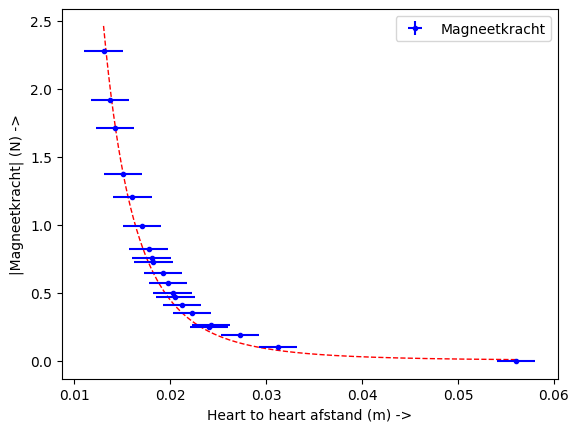

In [187]:
#(F,z)-plot met foutenbalken en fitfunctie
plt.figure()

#** [your code] **

min_value_z = min(z)
max_value_z = max(z)

x = np.linspace(min_value_z, max_value_z, 1000)
y = func(x, *popt)

plt.plot(x, y, 'r--', linewidth=1)

plt.xlabel("Heart to heart afstand (m) ->")
plt.ylabel("|Magneetkracht| (N) ->")
plt.errorbar(z, F, u_F, u_z, 'b.', label="Magneetkracht")
plt.legend()

plt.show()

#### Residue analyse
Het is nuttig om te onderzoeken of onze fit een 'goede' fit is. De hierboven gemaakte plot is niet de makkelijkste manier om dat te zien. Maar we kunnen gebruik maken van een residue analyse waarbij we "de metingen - de fit" tonen. De code hieronder geeft al een goed idee van hoe die analyse eruit moet zien. 

Analyseer het residue door de onderstaande code compleet te maken. 

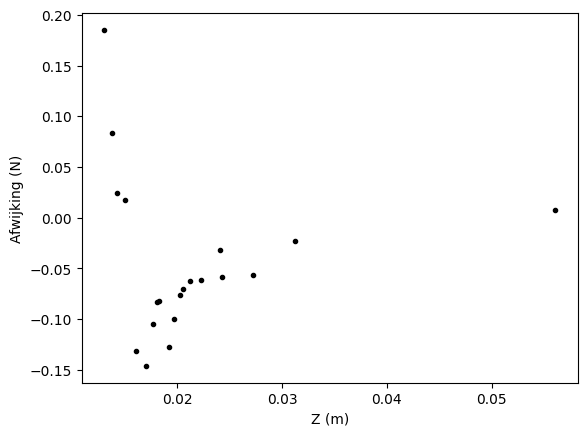

(array([3., 4., 6., 2., 2., 1., 1., 0., 0., 1.]),
 array([-0.14617237, -0.11303903, -0.07990569, -0.04677235, -0.01363901,
         0.01949433,  0.05262767,  0.08576102,  0.11889436,  0.1520277 ,
         0.18516104]),
 <BarContainer object of 10 artists>)

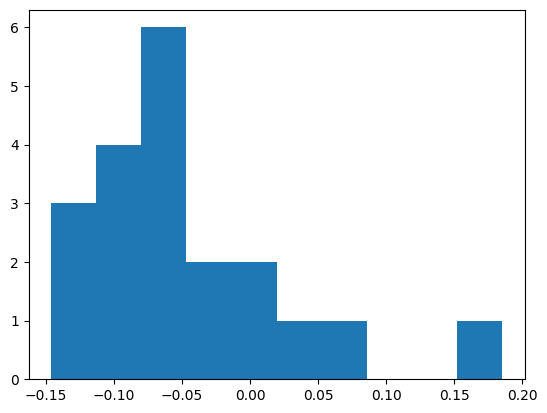

In [188]:
# Residue analyse
plt.figure()
plt.plot(z, func(z, popt[0]) - F, 'k.', linewidth=1)
plt.xlabel("Z (m)")
plt.ylabel("Afwijking (N)")
plt.show()
plt.figure()
plt.hist((func(z, popt[0]) - F))
#Geen duidelijke systematische afwijking te ontdekken

### Fitten met een systematische fout
We konden de hart-tot-hart afstand maar met een bepaalde nauwkeurigheid meten. Daarbij is er gebruik gemaakt van een referentiepunt. Dat kan er voor zorgen dat er sprake is van een systematische fout in de hart-tot-hart afstand. Dat kunnen we nader onderzoeken door te fitten aan de functie $F=\frac{a}{(z+\Delta z)^4}$, waarin $\Delta z$ onze systematische fout is. 

Onderzoek of er sprake is van een systematische fout.

The Delta z is 0.002968556339249945 ± 0.00024875132634239366 m.
The a is 1.4997323559861528e-07 ± 8.440872849310078e-09 Nm^4


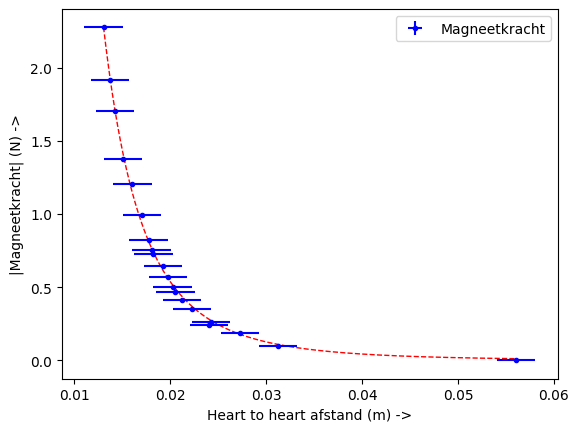

In [189]:
def funcwitherror(z, dz, a):
    return a / ((z + dz) ** 4)


val, cov = curve_fit(funcwitherror, z, F)
print("The Delta z is", val[0], "\u00B1", np.sqrt(cov[0, 0]), "m.")
print("The a is", val[1], "\u00B1", np.sqrt(cov[1, 1]), "Nm^4")

plt.figure()

min_value_z = min(z)
max_value_z = max(z)

x = np.linspace(min_value_z, max_value_z, 1000)
y = funcwitherror(x, val[0], val[1])

plt.plot(x, y, 'r--', linewidth=1)

plt.xlabel("Heart to heart afstand (m) ->")
plt.ylabel("|Magneetkracht| (N) ->")
plt.errorbar(z, F, u_F, u_z, 'b.', label="Magneetkracht")
plt.legend()

plt.show()


### Linear fit
In klas vier heb je geleerd hoe je een coordinaattransformatie uit moet voeren (waarschijnlijk ben je dat allang weer vergeten). Bij een coordinaattransformatie willen we de data beschrijven met een rechte lijn, in dit geval: $ F = a \cdot u $. Om dat te doen moeten we $ z^{-4} $ substitueren met $ u $. 

Maak een nieuwe variabel $ u $ met de waarden $ z^{-4} $ en plot $F$ als functie van $u$. Lijkt de grafiek linear?

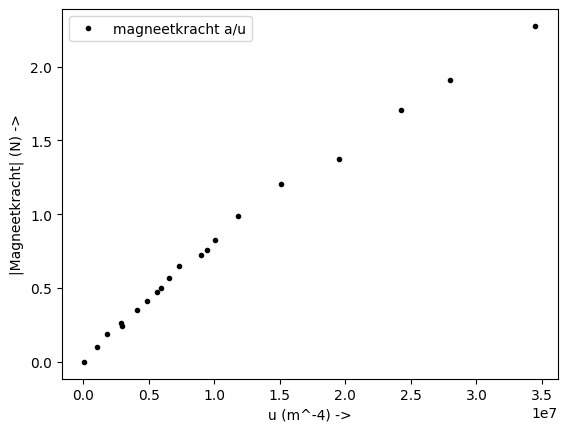

In [190]:
#(F,u)-plot zonder errorbars 
plt.figure()
u = z ** -4
#** [your code] **
min_value_z = min(u)
max_value_z = max(u)

plt.xlabel("u (m^-4) ->")
plt.ylabel("|Magneetkracht| (N) ->")
plt.plot(u, F, 'k.', linewidth=1, label="magneetkracht a/u")
plt.legend()

plt.show()

In de bovenstaande plot missen onze errorbars nog. Als $ u = z^{-4} $, dan $ u_u = 4 \cdot u_z \cdot z^{-5} $. Toon dit aan.

Bereken de onzekerheden voor $ u $ en maak de errorbarplot ($ F $, $ u $).

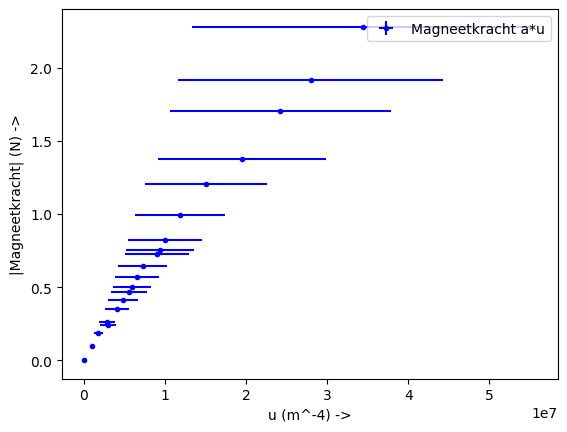

In [191]:
#(F,u)-plot met errorbars 
u_u = 4 * u_z * z ** -5

plt.figure()

min_value_z = min(u)
max_value_z = max(u)

plt.xlabel("u (m^-4) ->")
plt.ylabel("|Magneetkracht| (N) ->")
plt.errorbar(u, F, u_F, u_u, 'b.', label="Magneetkracht a*u")
plt.legend()

plt.show()

Nu gaan we een lineaire functie fitten. Voer de volgende stappen uit :
* defineer de functie voor deze fit 
* maak gebruik van curve fit om de data te fitten
* plot je metingen en bijbehorende fit

De waarde van a is 7.137858933709206e-08 +/- 1.4804927848089134e-09 Nm^4


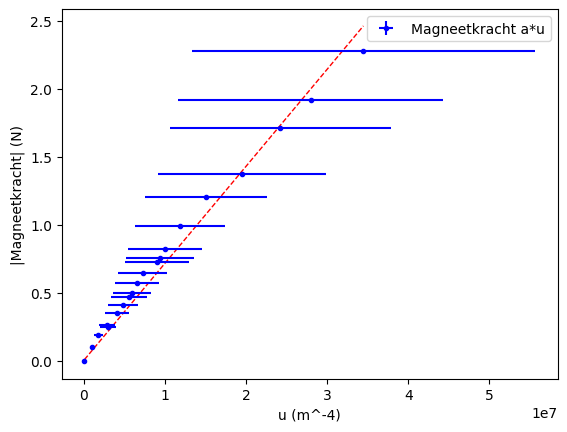

In [192]:
#(F,u)-plot met errorbars en de fitfunctie
def func_u(u, a):
    return a * u


val_u, cov_u = curve_fit(func_u, u, F)

print("De waarde van a is", val_u[0], "+/-", np.sqrt(cov_u[0, 0]), "Nm^4")

plt.figure()

min_value_u = min(u)
max_value_u = max(u)

x = np.linspace(min_value_u, max_value_u, 1000)
y = func_u(x, val_u[0])

plt.plot(x, y, 'r--', linewidth=1)

plt.xlabel("u (m^-4)")
plt.ylabel("|Magneetkracht| (N)")
plt.errorbar(u, F, u_F, u_u, 'b.', label="Magneetkracht a*u")
plt.legend()

plt.show()

Maak grafieken van je data die relevant zijn binnen de gegeven context.

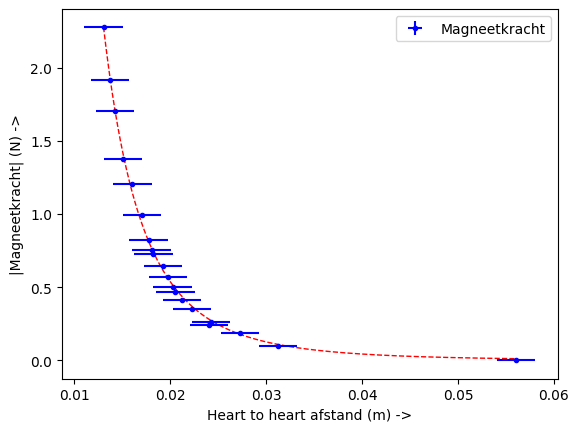

In [193]:
#aanvullende grafieken 
plt.figure()

min_value_z = min(z)
max_value_z = max(z)

x = np.linspace(min_value_z, max_value_z, 1000)
y = funcwitherror(x, val[0], val[1])

plt.plot(x, y, 'r--', linewidth=1)

plt.xlabel("Heart to heart afstand (m) ->")
plt.ylabel("|Magneetkracht| (N) ->")
plt.errorbar(z, F, u_F, u_z, 'b.', label="Magneetkracht")
plt.legend()

plt.show()


Er is minstens nog een aanvullende manier om het verwachtte exponentiele verband ($ y = a\cdot x^n $) te onderzoeken. We kunnen gebruik maken van een log-log plot om te zien of de richtingscoëfficient daarvan -4, en constant is. 

Onderzoek of dit geldt.

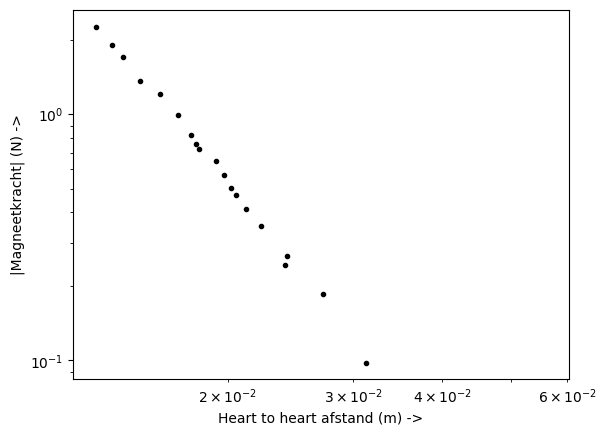

In [194]:
#extra analysis
plt.figure()  #Nieuw plot begin
plt.xlabel("Heart to heart afstand (m) ->")  #Assen labelen
plt.ylabel("|Magneetkracht| (N) ->")

plt.loglog(z, F, 'k.')  #Log-Log plot

plt.show()  #Plot printen

Misschien ben je nog steeds niet tevreden over de resultaten... Je kunt dan nog altijd onderzoeken wat de waarden van $a$ en $n$ zijn als je fit aan de functie $F = a \cdot z^{n}$...

De waarde van a is 6.948599586411358e-06 +/- 1.4420510464358122e-06 Nm^4
De waarde van n is -2.7658497950220737 +/- 0.046808949413212696


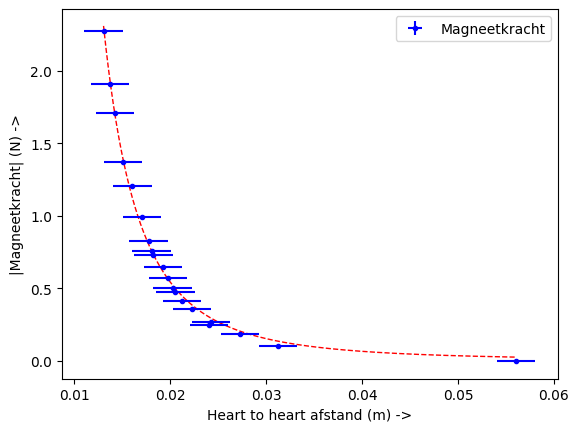

In [195]:
def func_azn(z, a, n):  #Functie F=a*z^n definiëren
    return a * ((z-val[0]) ** n)


val_azn, cov_azn = curve_fit(func_azn, z, F,
                             p0=[val[0], -4])  #Functie fitten met initial guesses uit de eerdere codeblocks

print("De waarde van a is", val_azn[0], "+/-", np.sqrt(cov_azn[0, 0]), "Nm^4")
print("De waarde van n is", val_azn[1], "+/-", np.sqrt(cov_azn[1, 1]))  #Waardes en onzekerheden printen

plt.figure()  #begin nieuw plot

min_value_z = min(z)  #grenswaarden horizontale as
max_value_z = max(z)

x = np.linspace(min_value_z, max_value_z, 1000)
y = func_azn(x, val_azn[0], val_azn[1])

plt.plot(x, y, 'r--', linewidth=1)  #plotting curve-fitted function

plt.xlabel("Heart to heart afstand (m) ->")  #Axes labeling
plt.ylabel("|Magneetkracht| (N) ->")
plt.errorbar(z, F, u_F, u_z, 'b.', label="Magneetkracht")  #Plotting data over the fitted function for comparison
plt.legend()

plt.show()

## Berekening van het remanente veld
Als je data goed beschreven kan worden met de formule $F=\frac{\alpha}{z^4}$ (eventueel met systematische fout), dan weten we nog niet of de theoretische benadering gevalideerd is. Daartoe moeten we het remanente veld uitrekenen en vergelijken met de datasheet van de producent van de magneten. Deze analyse omvat de volgende stappen:
* bereken de waarden van $\alpha$ en de bijbehorende meetonzekerheid 
* gebruik deze waarde om het remanente veld uit te rekenen $B_r$ 
* bereken de bijbehorende onzekerheid
* voor een strijdigsheidsanalyse uit om te onderzoeken of de waarden voldoende overeenkomen.

Voer de analyse uit.

In [196]:
a = val[1]
u_a = np.sqrt(cov[1, 1])
h_magneet = 0.005  #m
u_h_magneet = 0.0001  #m
d_magneet = 0.01  #m
u_d_magneet = 0.0001  #m
mu_0 = 1.25663706212e-6


def br_func(a, d, h):
    return np.sqrt(mu_0 * np.pi * 2 * a) / (
            (np.pi * (1 / 4) * ((d) ** 2)) * h * np.sqrt(3))  # Br = sqrt(mu*pi*2*alpha) / (V * sqrt(3))


u_Br = np.sqrt(
    (((br_func(a + u_a, d_magneet, h_magneet) - br_func(a - u_a, d_magneet, h_magneet)) / 2) ** 2) +
    (((br_func(a, d_magneet + u_d_magneet, h_magneet) - br_func(a, d_magneet - u_d_magneet, h_magneet)) / 2) ** 2) +
    (((br_func(a, d_magneet, h_magneet + u_h_magneet) - br_func(a, d_magneet,
                                                                h_magneet - u_h_magneet)) / 2) ** 2))  #Functional method
print("Het remanente veld is: {:.5e} \u00B1 {:.5e} T".format(br_func(a, d_magneet, h_magneet), u_Br))

#Strijdigheidsanalyse: verschil tussen officiële waarde en gemeten waarde is > 2x onzekerheid -> strijdig
officieleWaardeMaximum = 1.32
officielewaardeMinimum = 1.29
if np.abs(officielewaardeMinimum - br_func(a, d_magneet, h_magneet)) - 2 * u_Br > 0:
    print("Minimumwaarde en gemeten waarde zijn strijdig")
else:
    print("Minimumwaarde en gemeten waarde zijn niet strijdig")

if np.abs(officieleWaardeMaximum - br_func(a, d_magneet, h_magneet)) - 2 * u_Br > 0:
    print("Maximumwaarde en gemeten waarde zijn strijdig")
else:
    print("Maximumwaarde en gemeten waarde zijn niet strijdig")

Het remanente veld is: 1.59986e+00 ± 6.38549e-02 T
Minimumwaarde en gemeten waarde zijn strijdig
Maximumwaarde en gemeten waarde zijn strijdig


**Beschrijving van het patroon in de verwerkte data:**  


In [197]:
#Berekeningen o.a. rond de meetonzekerheden, incl de eindantwoorden.


# Discussie
Voeg hier de discussie toe.

# Conclusie
Voeg hier de conclusie toe.

# Andere notities, opmerkingen, verklaringen, gedachten etc


In [198]:
# Eventuele extra notities